# Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/run-or-walk/dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Read data

In [4]:
df=pd.read_csv('/kaggle/input/run-or-walk/dataset.csv')

# Data Inspection

In [5]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [6]:
df.shape

(88588, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


Dropping date time and username column

In [8]:
df = df.iloc[:,3:]

In [9]:
df

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...
88583,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


# Checking Null Values

In [11]:
df.isna().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

No Null values 

# Checking Outliers

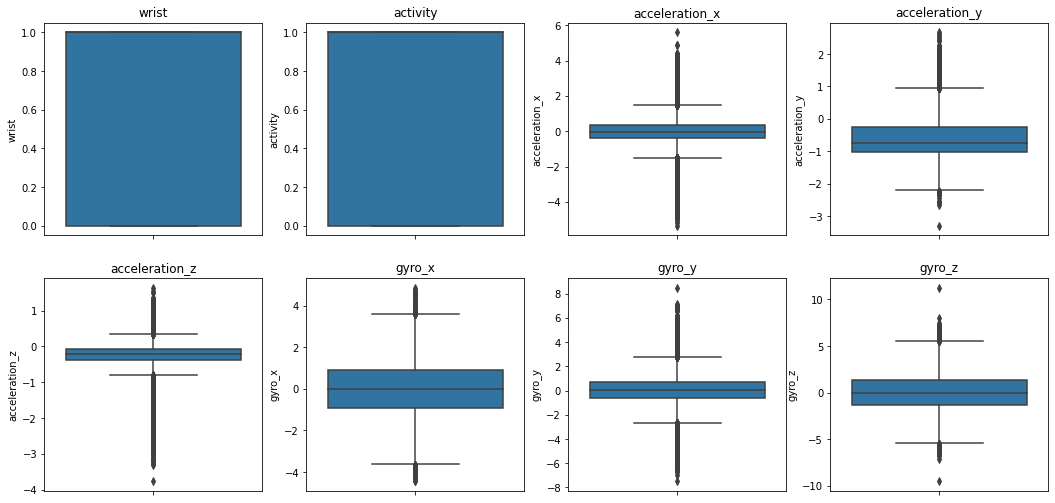

In [12]:
plt.figure(figsize=(18,18))
i=1
for x in df.columns:
    plt.subplot(4,4,i)
    sns.boxplot(y=df[x])
    plt.title(x)
    i+=1

No Outliers, all data points looks in clusters

# Visualization

In [13]:
dfv = df.copy()

In [14]:
dfv.activity=dfv.activity.map({0:'Walking',1:'Running'})
dfv.wrist=dfv.wrist.map({0:'Left',1:'Right'})

<AxesSubplot:xlabel='activity', ylabel='count'>

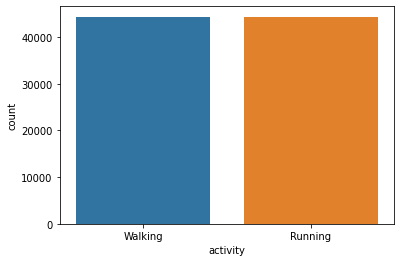

In [15]:
sns.countplot(dfv.activity)

<AxesSubplot:xlabel='count', ylabel='wrist'>

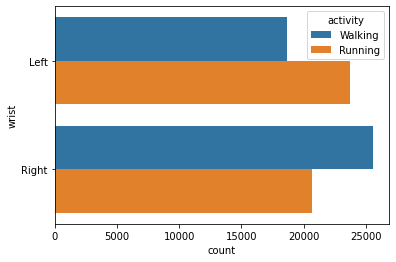

In [16]:
sns.countplot(y=dfv.wrist,hue=dfv.activity)

Dropping wrist column as it is not that important

In [17]:
df.drop('wrist',axis=1,inplace=True)

In [18]:
df['total_acceleration'] = np.sqrt((df.acceleration_x)**2 + (df.acceleration_y)**2 + (df.acceleration_z)**2)

In [19]:
actdf = df.groupby([dfv.activity])['total_acceleration'].agg({'mean','max'})

In [20]:
actdf

,mean,max
activity,,
Running,1.451963,5.737757
Walking,1.076322,2.182478


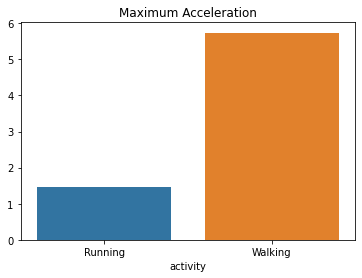

In [21]:
sns.barplot(y=actdf.max(),x=actdf.index)
plt.title('Maximum Acceleration')
plt.show()

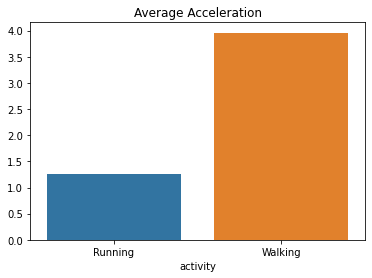

In [22]:
sns.barplot(y=actdf.mean(),x=actdf.index)
plt.title('Average Acceleration')
plt.show()

In [23]:
df

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


# Create X and Y

In [24]:
X = df.iloc[:,1:]

In [25]:
X

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,total_acceleration
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0.825148
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,1.329887
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,1.547307
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0.871729
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,1.048889
...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0.902382
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,1.202684
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,1.295380
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0.899638


In [26]:
Y = df.activity

# Handling Skewness

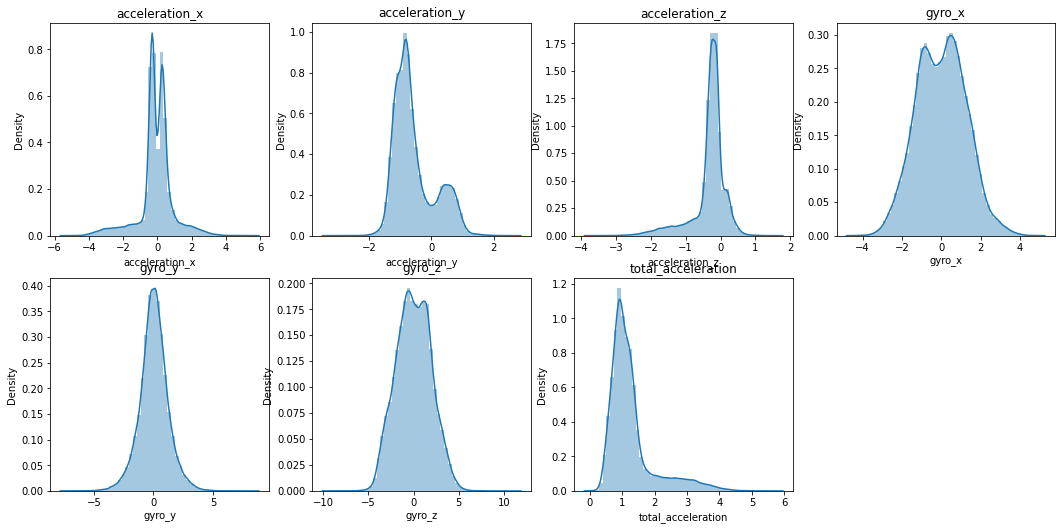

In [27]:
plt.figure(figsize=(18,18))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

In [28]:
# Taking Cuberoot Transformation
X = np.cbrt(X)

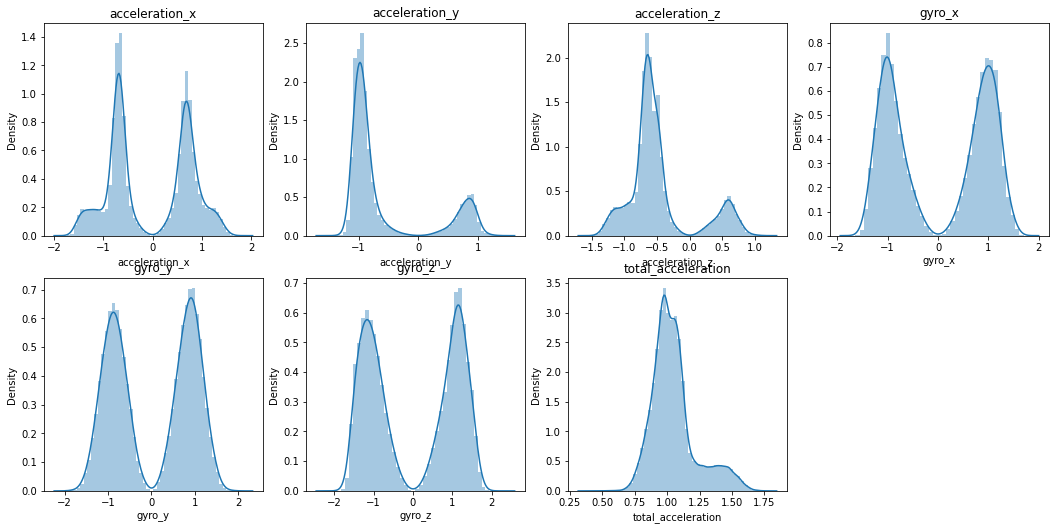

In [29]:
plt.figure(figsize=(18,18))
i=1
for x in X.columns:
    plt.subplot(4,4,i)
    sns.distplot(X[x])
    plt.title(x)
    i+=1

# Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)
X

array([[ 0.83135504, -0.49557968,  0.55924134, ...,  0.31056628,
        -1.27870498, -0.6550531 ],
       [ 1.11486163, -0.66181083, -0.28235723, ...,  0.26293233,
         0.43974795,  0.27558392],
       [ 0.97478213, -0.80288126,  1.78769792, ...,  0.47749369,
        -1.20295698,  0.60314055],
       ...,
       [ 0.98774393, -0.68511623, -0.36198388, ..., -0.73982453,
        -0.96731478,  0.22037903],
       [ 0.82542864, -0.53661128,  0.10476679, ...,  0.79712189,
        -1.08317917, -0.49731618],
       [ 0.87669745, -0.5061896 ,  0.05153661, ...,  1.07557997,
         0.95850351, -0.56959588]])

# Train

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=10) 

In [32]:
X_train.shape, X_test.shape,Y_train.shape, Y_test.shape

((66441, 7), (22147, 7), (66441,), (22147,))

# Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
lracc = accuracy_score(Y_test,Y_pred)
print(lracc)

[[10722   318]
 [  673 10434]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11040
           1       0.97      0.94      0.95     11107

    accuracy                           0.96     22147
   macro avg       0.96      0.96      0.96     22147
weighted avg       0.96      0.96      0.96     22147

0.9552535332099156


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(splitter='best',criterion='entropy',min_samples_split=3,min_samples_leaf=3)
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
dtacc = accuracy_score(Y_test,Y_pred)
print(dtacc)

[[10865   175]
 [  182 10925]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11040
           1       0.98      0.98      0.98     11107

    accuracy                           0.98     22147
   macro avg       0.98      0.98      0.98     22147
weighted avg       0.98      0.98      0.98     22147

0.9838804352734004


# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',criterion='entropy')
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
rfacc = accuracy_score(Y_test,Y_pred)
print(rfacc)

[[10931   109]
 [  106 11001]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

0.9902921388901431


# Extra Tree

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_features='log2',criterion='gini')
et.fit(X_train,Y_train)
Y_pred = et.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
etacc = accuracy_score(Y_test,Y_pred)
print(etacc)

[[10959    81]
 [  125 10982]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

0.9906985144714859


# XG Boost

In [38]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb.fit(X_train,Y_train)
Y_pred = gb.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
gbacc = accuracy_score(Y_test,Y_pred)
print(gbacc)

[07:08:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[10953    87]
 [   98 11009]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11040
           1       0.99      0.99      0.99     11107

    accuracy                           0.99     22147
   macro avg       0.99      0.99      0.99     22147
weighted avg       0.99      0.99      0.99     22147

0.991646724161286


# Model Comparision

In [39]:
models = pd.DataFrame([lracc,dtacc,rfacc,etacc,gbacc],
             index=['Logistic Regression','Decision Tree','Random Forest','Extra Tree','XG Boost'],columns=['Accuracy'])

In [40]:
models

,Accuracy
Logistic Regression,0.955254
Decision Tree,0.983880
Random Forest,0.990292
Extra Tree,0.990699
XG Boost,0.991647


In [41]:
models.Accuracy.sort_values(ascending=False).values

array([0.99164672, 0.99069851, 0.99029214, 0.98388044, 0.95525353])

<AxesSubplot:>

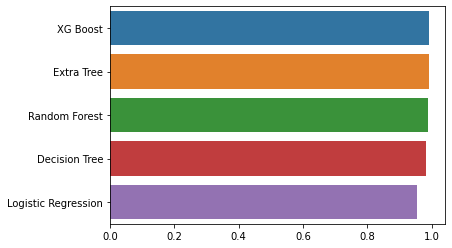

In [42]:
sns.barplot(x=models.Accuracy.sort_values(ascending=False).values,y = models.Accuracy.sort_values(ascending=False).index)